<a href="https://colab.research.google.com/github/PermanAtayev/Movie-revenue-prediction/blob/master/movie_revenue_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import ast
import lightgbm as lgb
import xgboost as xgb


import requests
from io import BytesIO

!pip install Pillow
from PIL import Image



import urllib


from collections import Counter
from sklearn import feature_extraction
from sklearn import preprocessing
from datetime import datetime
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures






In [2523]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [2524]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [2525]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


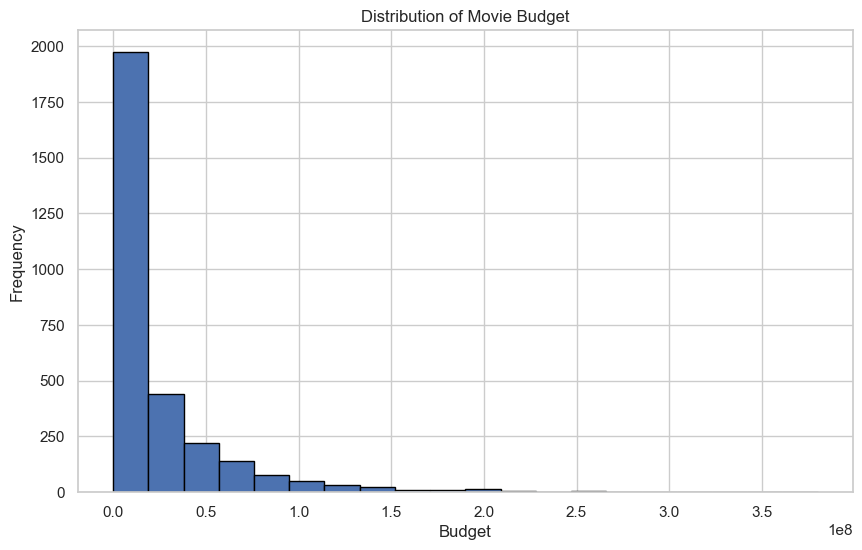

In [2526]:
plt.figure(figsize=(10, 6))
plt.hist(train['budget'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()


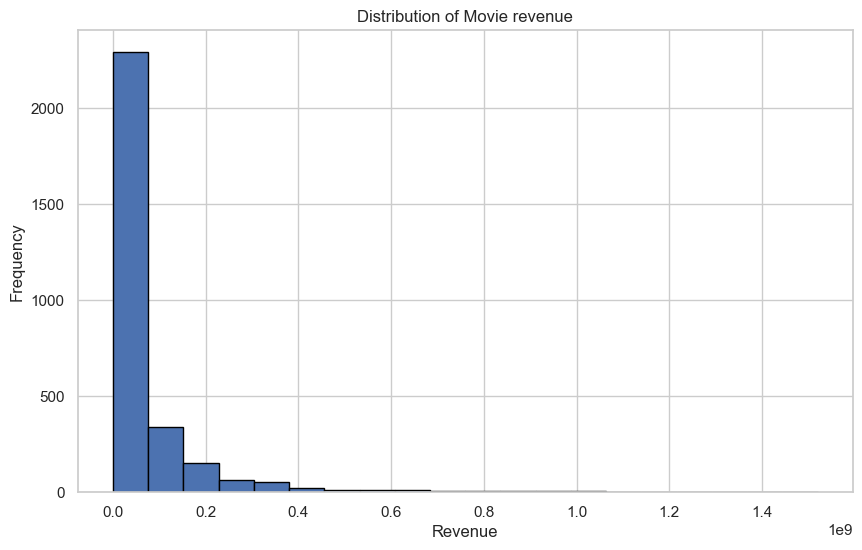

In [2527]:
plt.figure(figsize=(10, 6))
plt.hist(train['revenue'], bins=20, edgecolor='black')
plt.title('Distribution of Movie revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


In [2528]:
print('Movies with budget listed as 0: ',(train.budget == 0).sum())

Movies with budget listed as 0:  812


In [2529]:
median_budget = train['budget'].median()

# Replace values less than 10000 with the median budget
train['budget'] = np.where(train['budget'] < 10000, median_budget, train['budget'])


Movies with budget listed as 0:  0


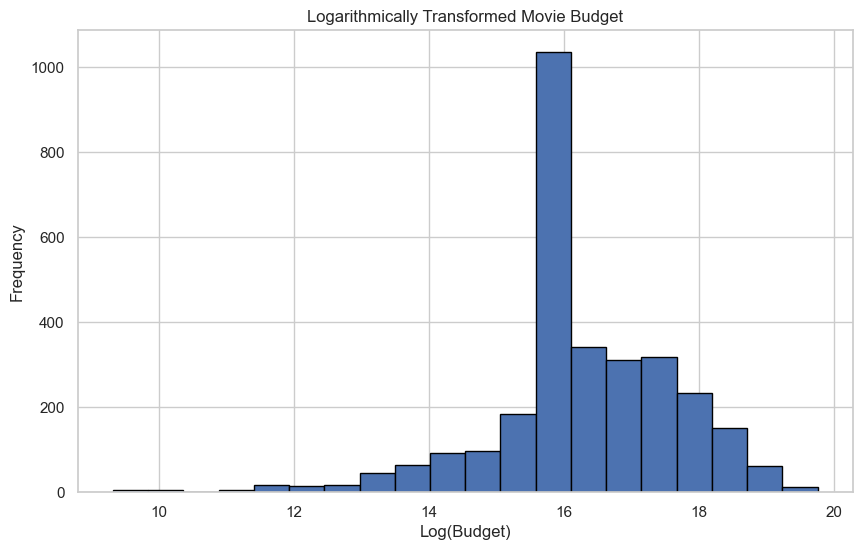

In [2530]:
print('Movies with budget listed as 0: ',(train.budget == 0).sum())
train['log_budget'] = np.log1p(train['budget'])

# Plot the distribution of the logarithmically transformed budget
plt.figure(figsize=(10, 6))
plt.hist(train['log_budget'], bins=20, edgecolor='black')
plt.title('Logarithmically Transformed Movie Budget')
plt.xlabel('Log(Budget)')
plt.ylabel('Frequency')
plt.show()




Movies with budget listed as 0:  0
Movies with budget listed as 0:  0


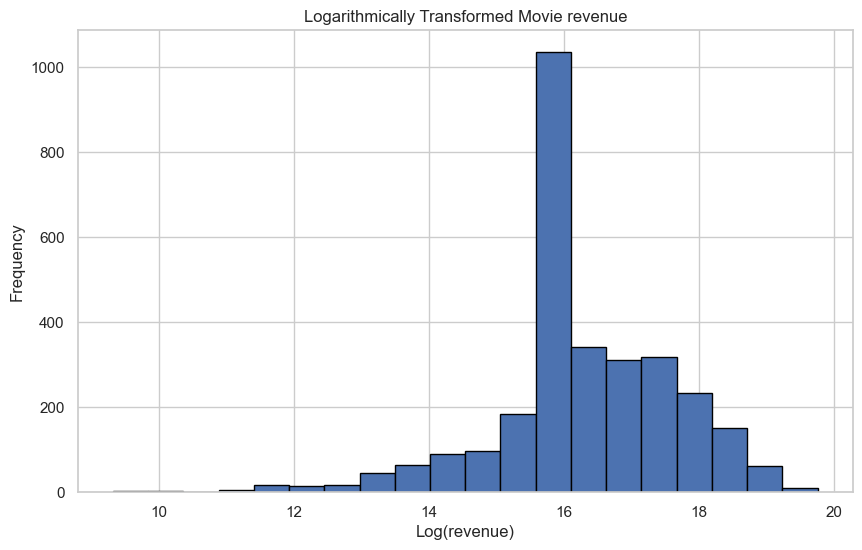

In [2531]:
print('Movies with budget listed as 0: ',(train.revenue == 0).sum())
median_revenue = train['revenue'].median()

# Replace values less than 10000 with the median budget
train['revenue'] = np.where(train['revenue'] < 10000, median_revenue, train['revenue'])
print('Movies with budget listed as 0: ',(train.revenue == 0).sum())
train['log_revenue'] = np.log1p(train['revenue'])

# Plot the distribution of the logarithmically transformed budget
plt.figure(figsize=(10, 6))
plt.hist(train['log_budget'], bins=20, edgecolor='black')
plt.title('Logarithmically Transformed Movie revenue')
plt.xlabel('Log(revenue)')
plt.ylabel('Frequency')
plt.show()


            revenue        budget
count  3.000000e+03  3.000000e+03
mean   6.724120e+07  2.475799e+07
std    1.373126e+08  3.582483e+07
min    1.001800e+04  1.117800e+04
25%    3.287128e+06  8.000000e+06
50%    1.680873e+07  8.000000e+06
75%    6.891920e+07  2.900000e+07
max    1.519558e+09  3.800000e+08


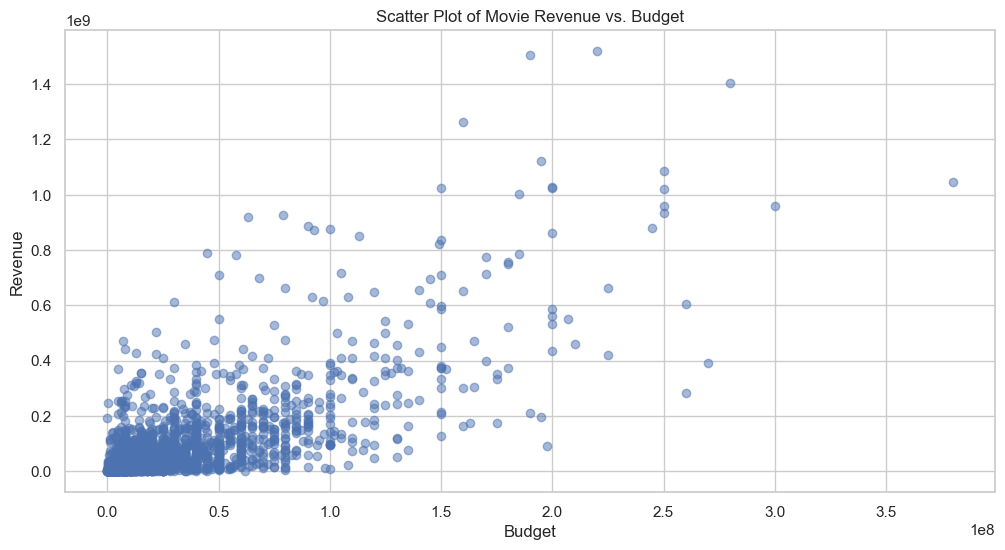

          budget      revenue revenue_class
0     14000000.0   12314651.0       Average
1     40000000.0   95149435.0           Hit
2      3300000.0   13092000.0   Blockbuster
3      1200000.0   16000000.0   Blockbuster
4      8000000.0    3923970.0          Flop
...          ...          ...           ...
2995   8000000.0    1596687.0          Flop
2996   8000000.0     180590.0          Flop
2997  65000000.0   89456761.0       Average
2998  42000000.0  171963386.0   Blockbuster
2999  35000000.0   82087155.0           Hit

[3000 rows x 3 columns]


In [2532]:
# Display summary statistics
print(train[['revenue', 'budget']].describe())

# Visualize the distribution with a scatter plot
plt.scatter(train['budget'], train['revenue'], alpha=0.5)
plt.title('Scatter Plot of Movie Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Exclude rows with budget = 0
train = train[train['budget'] > 0]

# Define conditions and labels for np.select based on revenue and budget
conditions = [
    (train['revenue'] > 3 * train['budget']),  # Very much greater than budget
    (train['revenue'] > 1.5*train['budget']),      # Greater than budget
    (train['revenue'] >= 0.8 * train['budget']),  # Almost as budget
    (train['revenue'] < 0.8 * train['budget'])   # Very less than budget
]

# Ensure the number of conditions matches the number of labels
labels = ['Blockbuster', 'Hit', 'Average', 'Flop']

# Create the 'revenue_class' column using np.select
train['revenue_class'] = np.select(conditions, labels, default='Other')

# Print the DataFrame with the new column
print(train[['budget', 'revenue', 'revenue_class']])


C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_25928\1871126677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='revenue_class', data=train, palette='viridis')


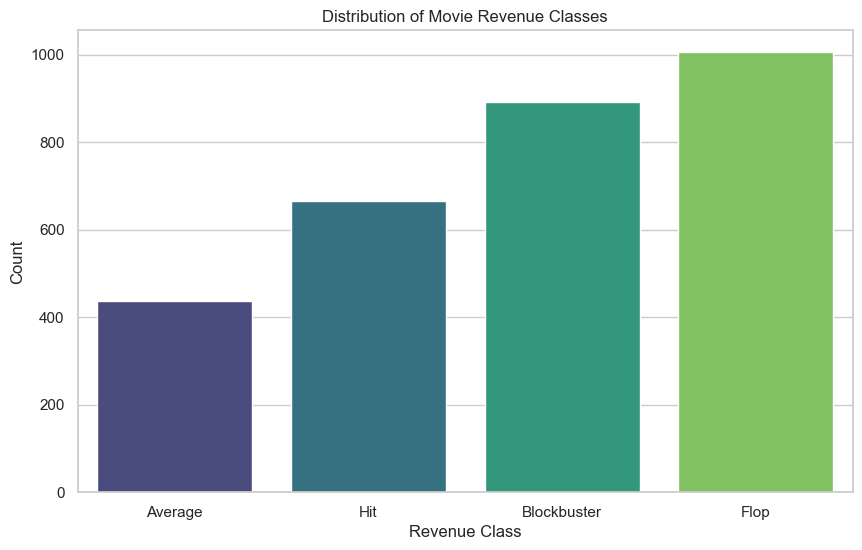

In [2533]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a count plot for 'revenue_class'
plt.figure(figsize=(10, 6))
sns.countplot(x='revenue_class', data=train, palette='viridis')
plt.title('Distribution of Movie Revenue Classes')
plt.xlabel('Revenue Class')
plt.ylabel('Count')
plt.show()



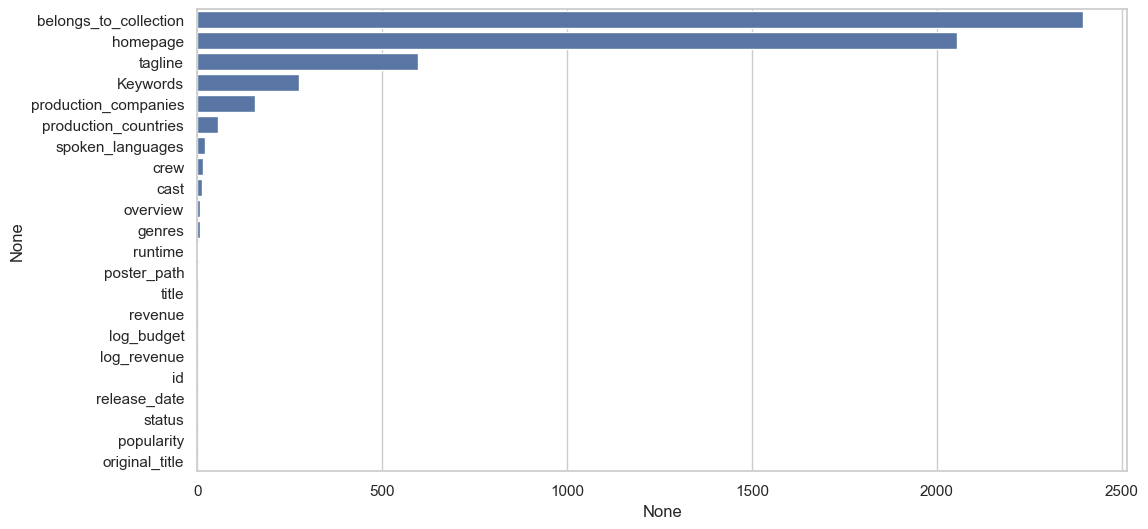

In [2534]:
missing=train.isna().sum().sort_values(ascending=False)
sns.barplot(x=missing[:22], y=missing[:22].index)
plt.style.use('dark_background')
plt.show()

In [2535]:
dict_columns = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
dfx = text_to_dict(train)
for col in dict_columns:
       train[col]=dfx[col]

dfx = text_to_dict(test)
for col in dict_columns:
  test[col]=dfx[col]

In [2536]:
train.belongs_to_collection = train.belongs_to_collection.apply(lambda x: 1 if type(x) == str else 0)
print(train.belongs_to_collection.value_counts())

belongs_to_collection
0    2396
1     604
Name: count, dtype: int64


Text(0.5, 0, 'Collection Status')

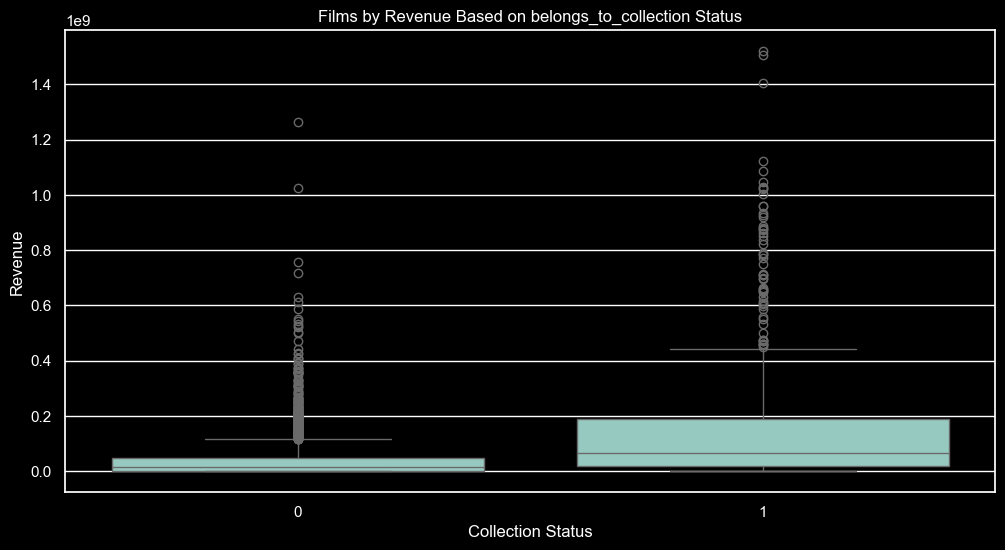

In [2537]:
labels = 'Not in Collection', 'Belongs to Collection'
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='belongs_to_collection', y='revenue', data=train)
plt.title('Films by Revenue Based on belongs_to_collection Status')
plt.ylabel("Revenue")
plt.xlabel("Collection Status")


In [2538]:
features.append('belongs_to_collection')

<Axes: >

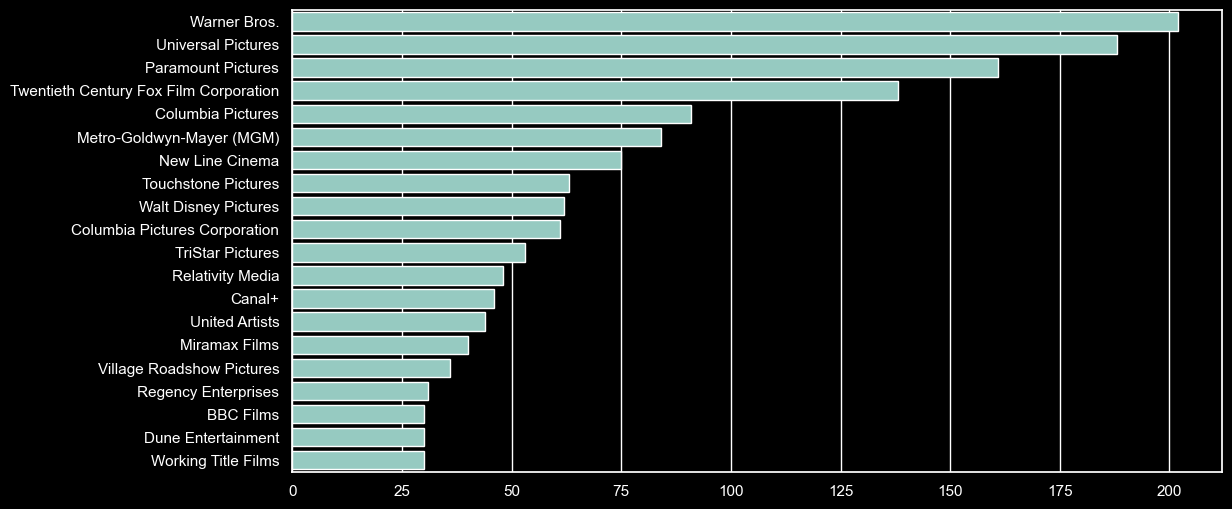

In [2539]:
x=train['production_companies'].apply(lambda x : [x[i]['name'] for i in range(len(x))] if x != {} else []).values
count=Counter([i for j in x for i in j]).most_common(20)
sns.barplot(x=[val[1] for val in count], y=[val[0] for val in count])

In [2540]:
train['spoken_languages'].apply(lambda x:len(x) if x !={} else 0).value_counts()

spoken_languages
1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: count, dtype: int64

In [2541]:
print("Counts of each original language:")
print(train['original_language'].value_counts()[:10])

Counts of each original language:
original_language
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
Name: count, dtype: int64


Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

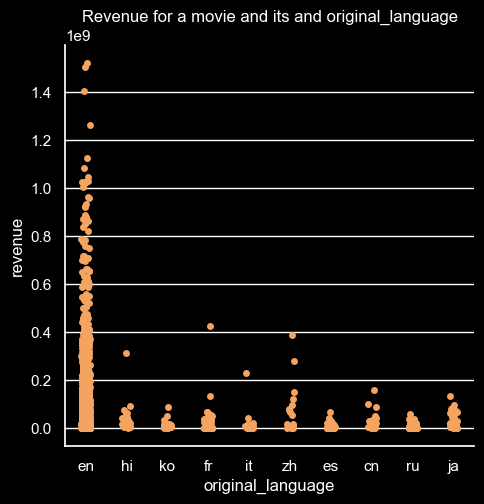

In [2542]:
sns.catplot(x='original_language', y='revenue', color='sandybrown', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and original_language')

In [2543]:
train['originally_english'] = train.original_language.apply(lambda x: 1 if x == 'en' else 0)
train['originally_english'].value_counts()

originally_english
1    2575
0     425
Name: count, dtype: int64

<Axes: >

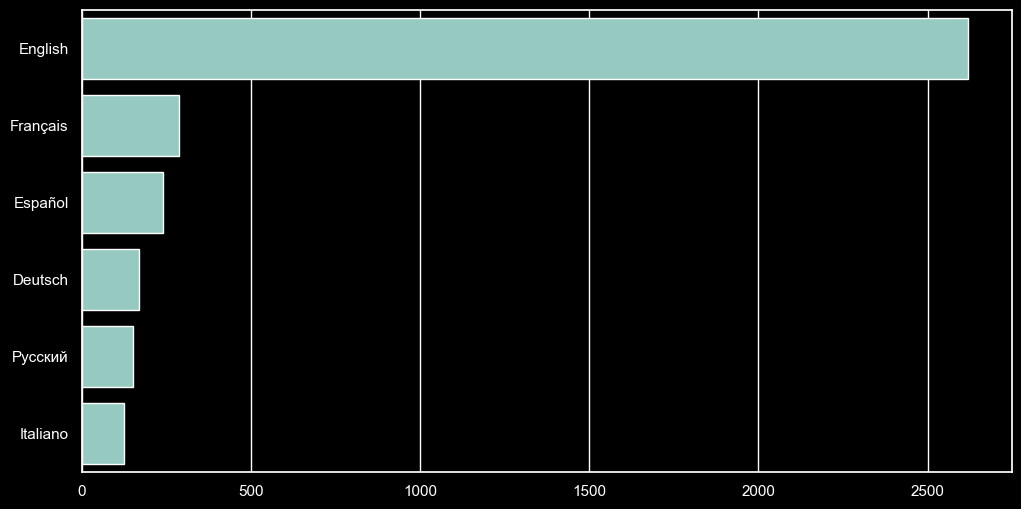

In [2544]:
lang=train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
count=Counter([i for j in lang for i in j]).most_common(6)
sns.barplot(x=[val[1] for val in count],y=[val[0] for val in count])

In [2545]:
# Create a new column 'num_languages'
train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Display the DataFrame with the new 'num_languages' column
print(train[['spoken_languages', 'num_languages']].head())


                                    spoken_languages  num_languages
0           [{'iso_639_1': 'en', 'name': 'English'}]              1
1           [{'iso_639_1': 'en', 'name': 'English'}]              1
2           [{'iso_639_1': 'en', 'name': 'English'}]              1
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...              2
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]              1


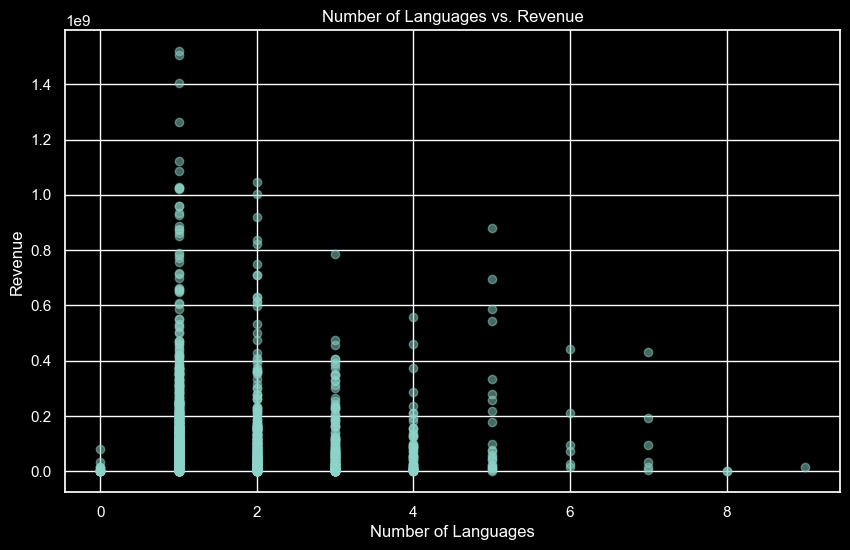

In [2546]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train['num_languages'], train['revenue'], alpha=0.5)
plt.title('Number of Languages vs. Revenue')
plt.xlabel('Number of Languages')
plt.ylabel('Revenue')
plt.show()


In [2547]:
# Create a new column 'released_in_english'
train['released_in_english'] = train['spoken_languages'].apply(lambda x: any(lang['name'] == 'English' for lang in x) if isinstance(x, list) else False)

# Convert boolean values to binary 0 and 1
train['released_in_english'] = train['released_in_english'].astype(int)

# Display the DataFrame with the new 'released_in_english' column
print(train[['spoken_languages', 'released_in_english']].head())


                                    spoken_languages  released_in_english
0           [{'iso_639_1': 'en', 'name': 'English'}]                    1
1           [{'iso_639_1': 'en', 'name': 'English'}]                    1
2           [{'iso_639_1': 'en', 'name': 'English'}]                    1
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...                    1
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]                    0


C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_25928\2414510213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='released_in_english', y='revenue', data=train, palette='viridis')


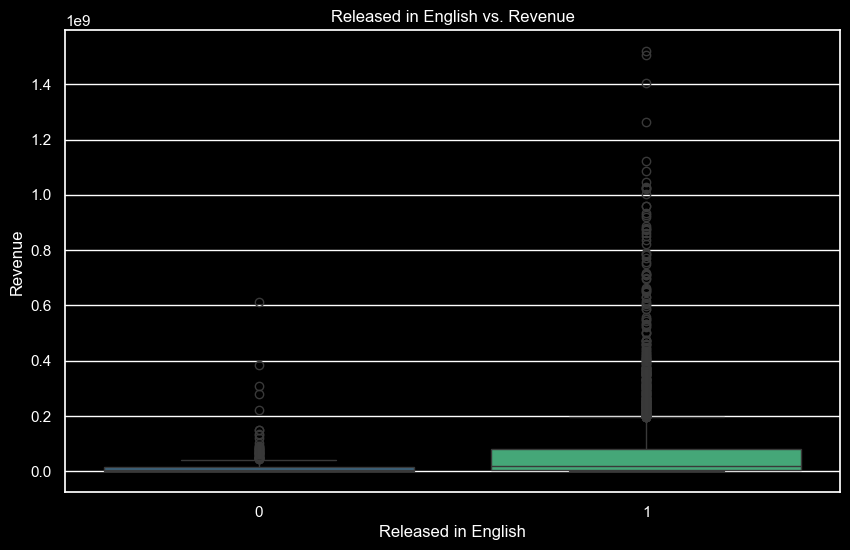

In [2548]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='released_in_english', y='revenue', data=train, palette='viridis')
plt.title('Released in English vs. Revenue')
plt.xlabel('Released in English')
plt.ylabel('Revenue')
plt.show()


<Axes: >

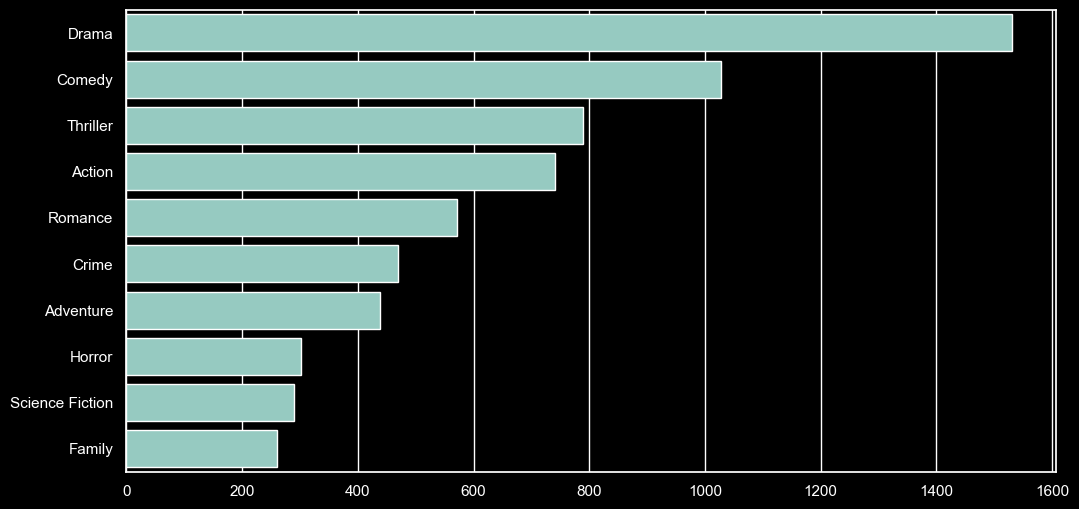

In [2549]:
genre=train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
count=Counter([i for j in genre for i in j]).most_common(10)
sns.barplot(x=[val[1] for val in count],y=[val[0] for val in count])

In [2550]:
# Create a new column 'num_genres' with the number of genres for each movie
train['num_genres'] = train['genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Display the DataFrame with the new column
print(train[['genres', 'num_genres']].head())


                                              genres  num_genres
0                     [{'id': 35, 'name': 'Comedy'}]           1
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...           4
2                      [{'id': 18, 'name': 'Drama'}]           1
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...           2
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...           2


Text(0.5, 0, 'Genre')

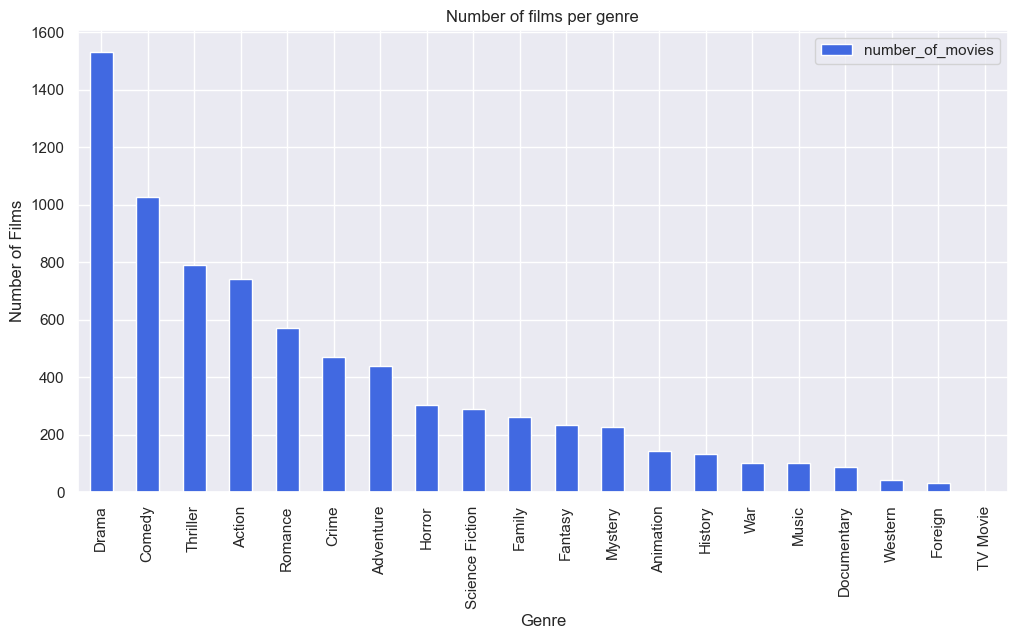

In [2551]:
# plotting genres in order of number of instances in the df.csv dataset
genresDict = dict()

for genre in df["genres"]:
    for elem in genre:
        if elem not in genresDict:
            genresDict[elem] = 1
        else:
            genresDict[elem] += 1


sns.set(rc={'figure.figsize':(12,6)})
genres_df = pd.DataFrame.from_dict(genresDict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Genre")

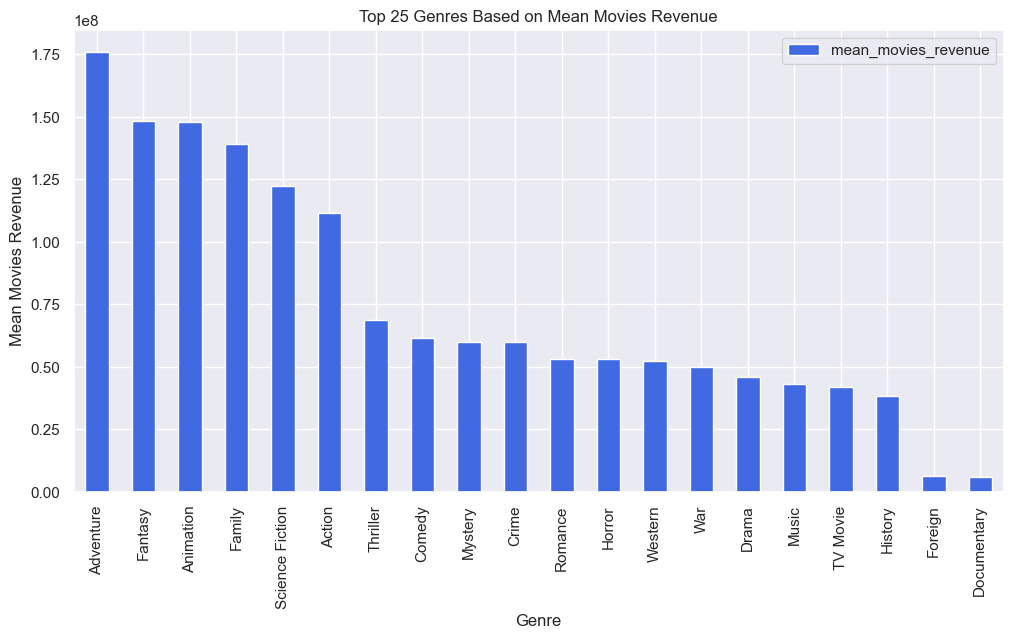

In [2552]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'genres' is the column containing the list of dictionaries
topGenreDict = {}

for element in train[['revenue', 'genres']].values:
    for genre_info in element[1]:
        genre_name = genre_info['name']
        if genre_name not in topGenreDict:
            topGenreDict[genre_name] = [element[0], 1]
        else:
            topGenreDict[genre_name][0] += element[0]
            topGenreDict[genre_name][1] += 1

for genre in topGenreDict:
    topGenreDict[genre][0] = topGenreDict[genre][0] / topGenreDict[genre][1]
    topGenreDict[genre] = topGenreDict[genre][0]

genres_df = pd.DataFrame.from_dict(topGenreDict, orient='index', columns=["mean_movies_revenue"])
top_genres = genres_df.sort_values(by="mean_movies_revenue", ascending=False).head(25)

top_genres.plot.bar(color='royalblue')
plt.xlabel('Genre')
plt.ylabel('Mean Movies Revenue')
plt.title('Top 25 Genres Based on Mean Movies Revenue')
plt.show()


In [2553]:
print('Movies missing a homepage:',train.homepage.isna().sum())

Movies missing a homepage: 2054


In [2554]:
train['has_homepage'] = train.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
train['has_homepage'].value_counts()

has_homepage
0    2054
1     946
Name: count, dtype: int64

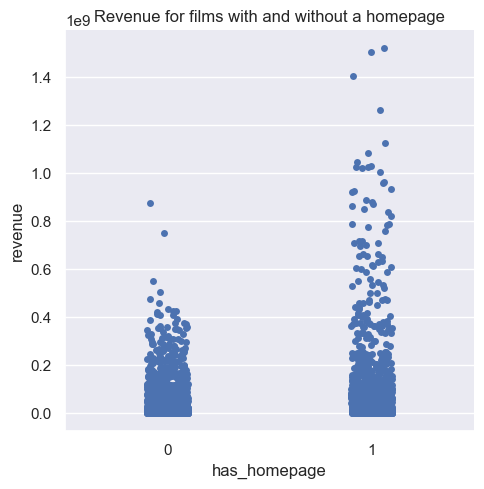

In [2555]:
ax = sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for films with and without a homepage');

labels = 'Has a homepage', 'Does not have a homepage'

In [2556]:
train.drop('imdb_id', axis=1, inplace=True)
train.drop('original_title', axis=1, inplace=True)
train.drop('poster_path', axis=1, inplace=True)

In [2557]:
def count_words(text):
    return len(str(text).split())

# Apply the function to the 'overview' column and create a new column 'word_count'
train['overveiw_count'] = train['overview'].apply(count_words)

# Display the DataFrame with the new 'word_count' column
print(train[['overview', 'overveiw_count']].head())

                                            overview  overveiw_count
0  When Lou, who has become the "father of the In...              29
1  Mia Thermopolis is now a college graduate and ...              69
2  Under the direction of a ruthless instructor, ...              21
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...             106
4  Marine Boy is the story of a former national s...              32


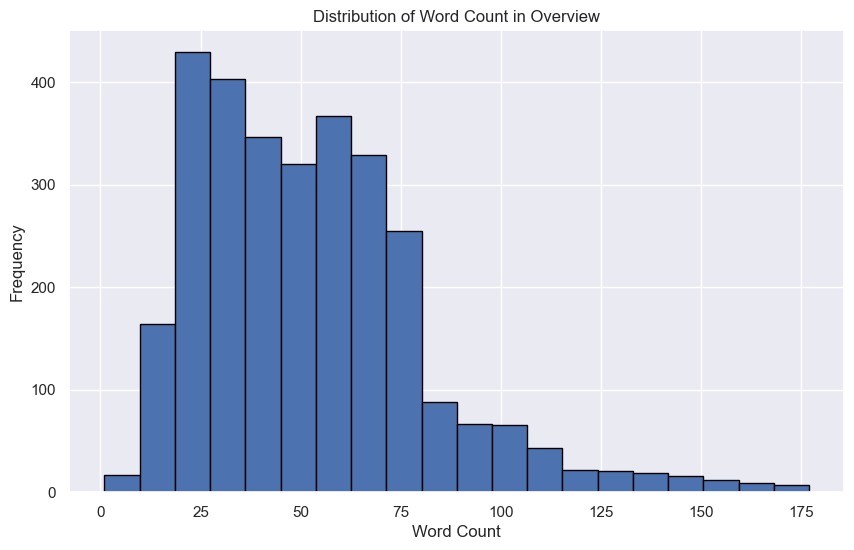

In [2558]:
plt.figure(figsize=(10, 6))
plt.hist(train['overveiw_count'], bins=20, edgecolor='black')
plt.title('Distribution of Word Count in Overview')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

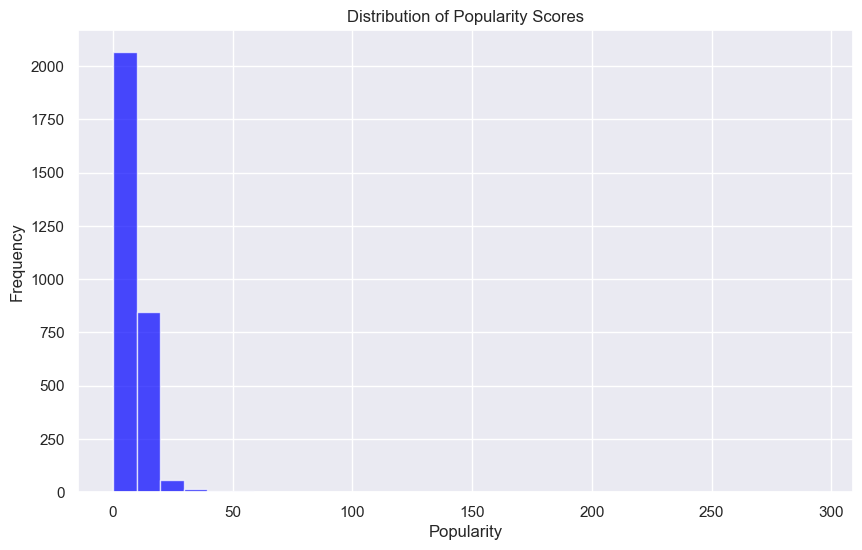

Summary Statistics for Popularity:
count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64


In [2559]:
# Plot the histogram of popularity scores
plt.figure(figsize=(10, 6))
plt.hist(train['popularity'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print summary statistics
print("Summary Statistics for Popularity:")
print(train['popularity'].describe())

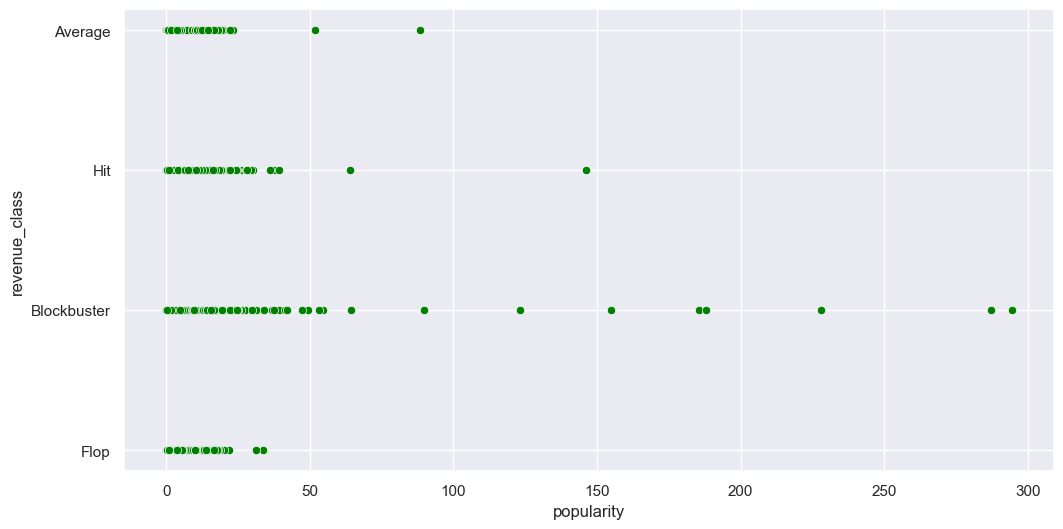

In [2560]:
sns.scatterplot(x=train['popularity'],y=train['revenue_class'],color='green')
plt.show()

In [2561]:
train['num_company'] = train.production_companies.apply(lambda x: len(x))
train['num_company'].value_counts()

num_company
1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
10      7
11      7
12      3
15      2
16      2
13      1
14      1
17      1
Name: count, dtype: int64

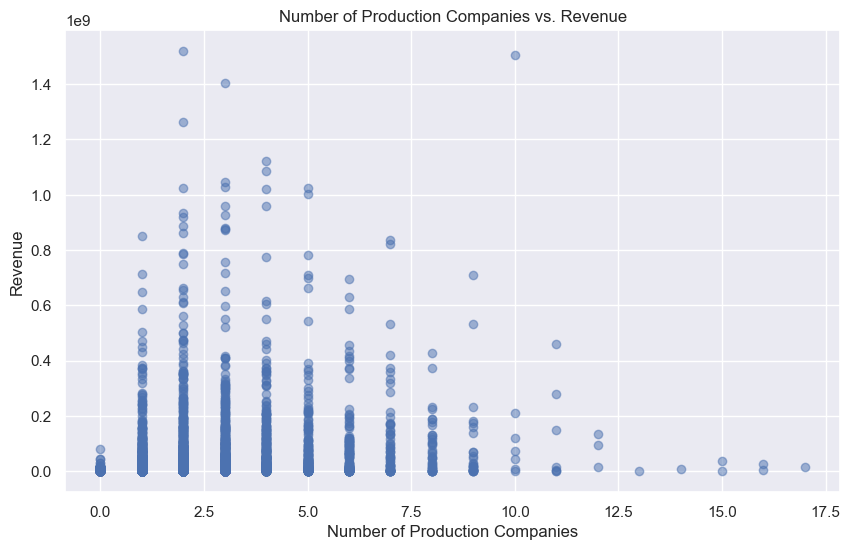

In [2562]:
plt.figure(figsize=(10, 6))
plt.scatter(train['num_company'], train['revenue'], alpha=0.5)
plt.title('Number of Production Companies vs. Revenue')
plt.xlabel('Number of Production Companies')
plt.ylabel('Revenue')
plt.show()

In [2563]:

# Create a list to store the success values for each movie
movie_success_list = []

# Create a dictionary to store counts for each production company
company_counts = {}

# Iterate over each row in the DataFrame
for _, row in train.iterrows():
    total_hits_blockbusters = 0
    total_films = 0
    
    # Iterate over each production company in the movie
    for company in row['production_companies']:
        # Update counts based on the revenue class of the movie
        total_hits_blockbusters += 1 if row['revenue_class'] in ['Hit', 'Blockbuster'] else 0
        total_films += 1
        
        # Update counts in the dictionary
        if company['name'] not in company_counts:
            company_counts[company['name']] = {'hits_blockbusters': 0, 'total_films': 0}
        company_counts[company['name']]['hits_blockbusters'] += total_hits_blockbusters
        company_counts[company['name']]['total_films'] += total_films

# Calculate the success for each production company
company_success = {company: counts['hits_blockbusters'] / counts['total_films'] if counts['total_films'] > 0 else 0 for company, counts in company_counts.items()}

# Map the company success back to the original DataFrame
train['company_success'] = train['production_companies'].apply(lambda x: sum(company_success.get(item['name'], 0) for item in x) / len(x) if isinstance(x, list) and len(x) > 0 else 0)

# Display the DataFrame with the new 'company_success' column
print(train[['production_companies', 'company_success']].head())


                                production_companies  company_success
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...         0.646158
1        [{'name': 'Walt Disney Pictures', 'id': 2}]         0.806452
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...         0.788095
3                                                 {}         0.000000
4                                                 {}         0.000000


C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_25928\1330737830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='revenue_class', y='company_success', data=train, palette='viridis')


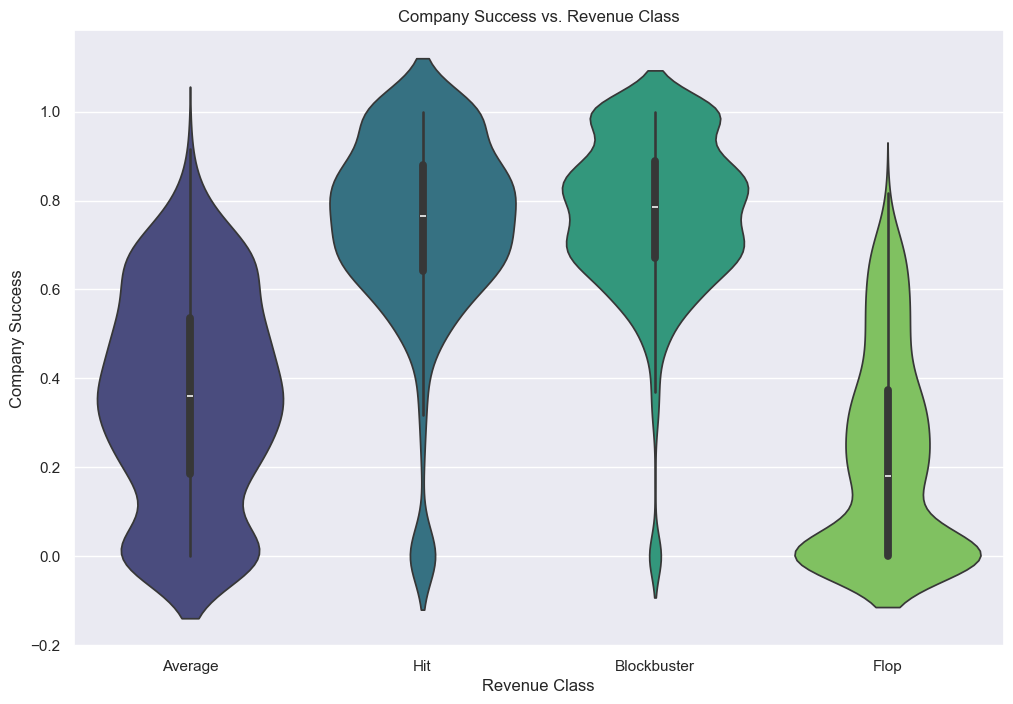

In [2564]:
# Plotting
plt.figure(figsize=(12, 8))
sns.violinplot(x='revenue_class', y='company_success', data=train, palette='viridis')
plt.title('Company Success vs. Revenue Class')
plt.xlabel('Revenue Class')
plt.ylabel('Company Success')
plt.show()



<Axes: >

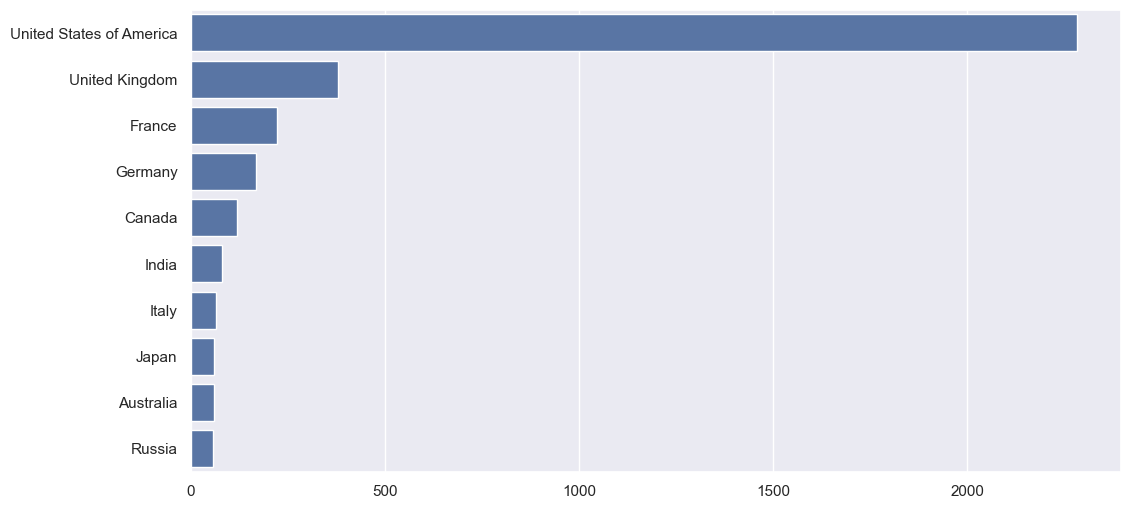

In [2565]:
countries=train['production_countries'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values
count=Counter([j for i in countries for j in i]).most_common(10)
sns.barplot(x=[val[1] for val in count],y=[val[0] for val in count])



In [2566]:
# Create a new column 'usa_produced'
train['usa_produced'] = train['production_countries'].apply(lambda x: any(country['name'] == 'United States of America' for country in x) if isinstance(x, list) else False)

# Convert boolean values to binary 0 and 1
train['usa_produced'] = train['usa_produced'].astype(int)

# Display the DataFrame with the new 'usa_produced' column
print(train[['production_countries', 'usa_produced']].head())


                                production_countries  usa_produced
0  [{'iso_3166_1': 'US', 'name': 'United States o...             1
1  [{'iso_3166_1': 'US', 'name': 'United States o...             1
2  [{'iso_3166_1': 'US', 'name': 'United States o...             1
3            [{'iso_3166_1': 'IN', 'name': 'India'}]             0
4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]             0


C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_25928\2049451212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x='usa_produced', y='revenue', data=train, palette=pal3);


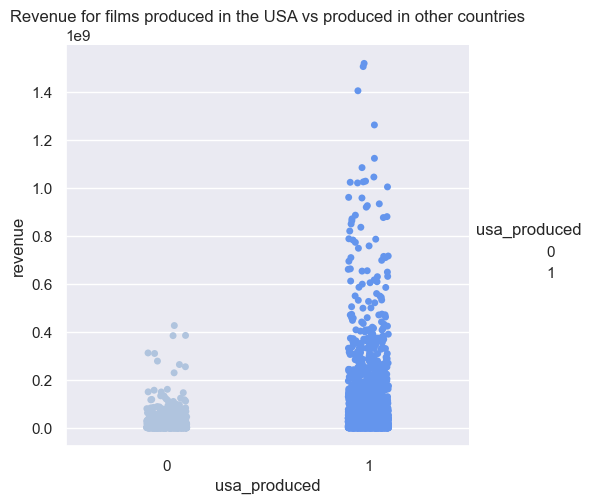

In [2567]:
pal3 = ['lightsteelblue', 'cornflowerblue']

ax = sns.catplot(x='usa_produced', y='revenue', data=train, palette=pal3);
plt.title('Revenue for films produced in the USA vs produced in other countries');


In [2568]:
train['has_tagline'] = train.tagline.apply(lambda x: 1 if type(x) == str else 0)

C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_25928\1780901525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x='has_tagline', y='revenue', data=train, palette=pal4);


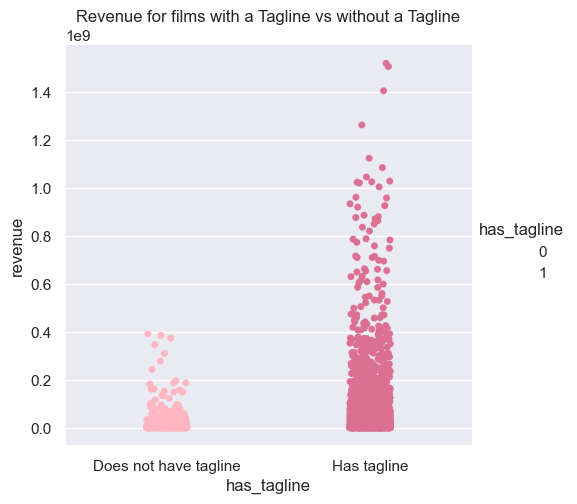

In [2569]:
pal4 = ['lightpink', 'palevioletred']

ax = sns.catplot(x='has_tagline', y='revenue', data=train, palette=pal4);
plt.title('Revenue for films with a Tagline vs without a Tagline');

labels = 'Does not have tagline', 'Has tagline'
ax.set_xticklabels(labels)

In [2570]:
# Create a new column 'num_words_in_title'
train['num_words_in_title'] = train['title'].apply(lambda x: len(str(x).split()))

# Display the DataFrame with the new 'num_words_in_title' column
print(train[['title', 'num_words_in_title']].head())


                                      title  num_words_in_title
0                    Hot Tub Time Machine 2                   5
1  The Princess Diaries 2: Royal Engagement                   6
2                                  Whiplash                   1
3                                   Kahaani                   1
4                                Marine Boy                   2


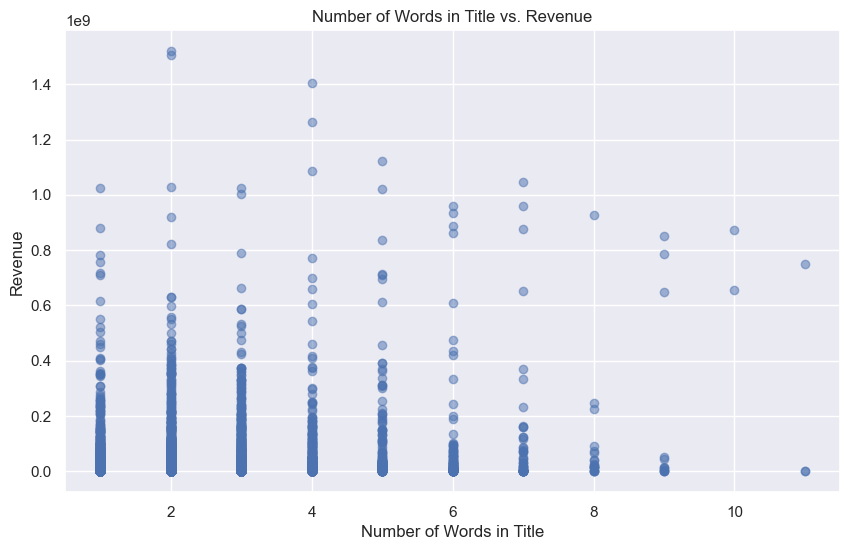

In [2571]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train['num_words_in_title'], train['revenue'], alpha=0.5)
plt.title('Number of Words in Title vs. Revenue')
plt.xlabel('Number of Words in Title')
plt.ylabel('Revenue')
plt.show()


## Splitting date, into day, month and year

     release_date  release_day  release_month  release_year
0      2015-02-20            4              2          2015
1      2004-08-06            4              8          2004
2      2014-10-10            4             10          2014
3      2012-03-09            4              3          2012
4      2009-02-05            3              2          2009
...           ...          ...            ...           ...
2995   1994-04-22            4              4          1994
2996   2013-03-28            3              3          2013
2997   1996-10-11            4             10          1996
2998   2004-01-16            4              1          2004
2999   2011-09-22            3              9          2011

[3000 rows x 4 columns]


C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_25928\707969757.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], rotation=45)


Text(0, 0.5, 'No of releases')

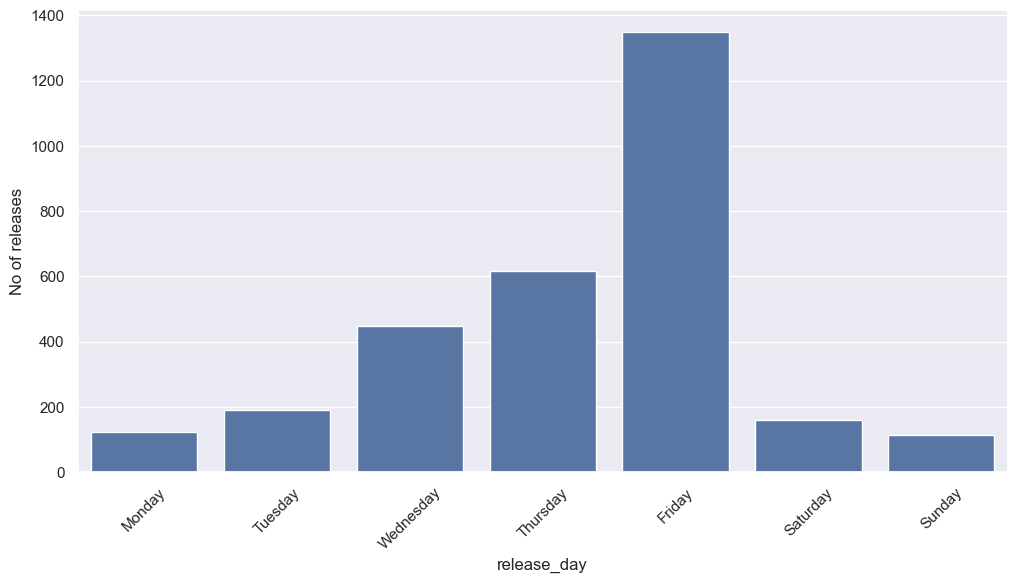

In [2572]:

def date(x):
    x = str(x)
    day, month, year = map(int, x.split('/'))
    
    if year < 19:
        year += 2000
    else:
        year += 1900

    return '{:02d}/{:02d}/{:04d}'.format(day, month, year)


# Example usage on the 'release_date' column
train['release_date'] = train['release_date'].fillna('1/1/90').apply(lambda x: date(x))
test['release_date']=test['release_date'].fillna('1/1/90').apply(lambda x: date(x))

train['release_date']=train['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
test['release_date']=test['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))


train['release_day']=train['release_date'].apply(lambda x:x.weekday())
train['release_month']=train['release_date'].apply(lambda x:x.month)
train['release_year']=train['release_date'].apply(lambda x:x.year)

test['release_day']=test['release_date'].apply(lambda x:x.weekday())
test['release_month']=test['release_date'].apply(lambda x:x.month)
test['release_year']=test['release_date'].apply(lambda x:x.year)


# Display the updated DataFrame
print(train[['release_date', 'release_day', 'release_month', 'release_year']])
day=train['release_day'].value_counts().sort_index()
sns.barplot(x=day.index,y=day)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], rotation=45)

plt.ylabel('No of releases')


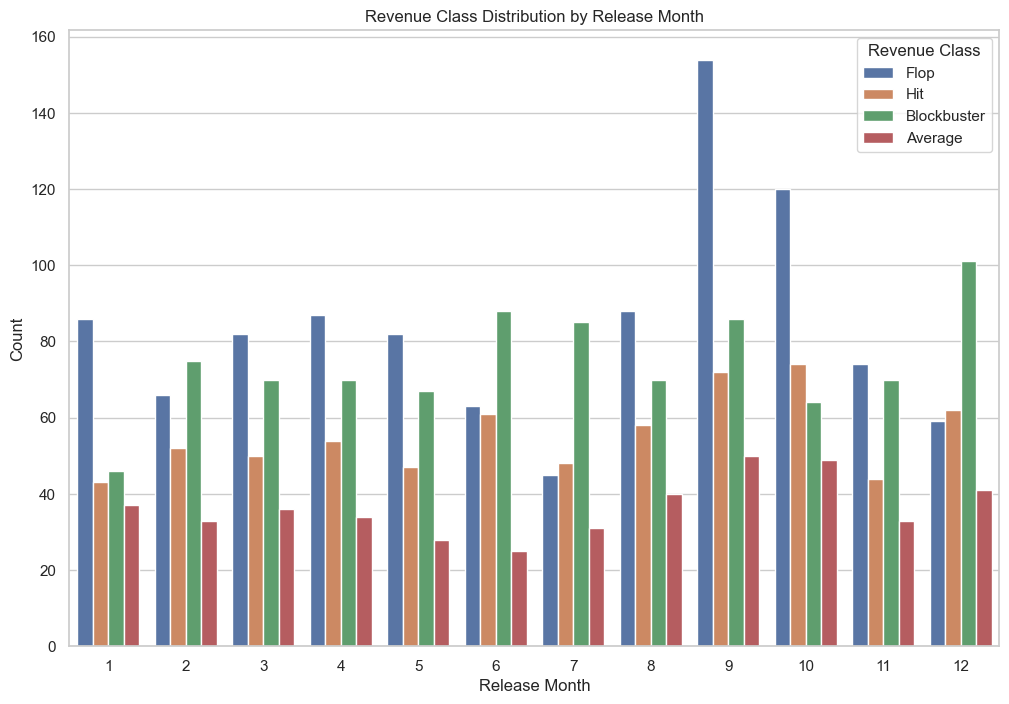

In [2573]:
# Assuming 'train' is your DataFrame
# Replace 'train' with your actual DataFrame if needed
sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(12, 8))

# Bar plot
sns.countplot(x='release_month', hue='revenue_class', data=train, order=range(1, 13))
plt.title('Revenue Class Distribution by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.legend(title='Revenue Class')
plt.show()


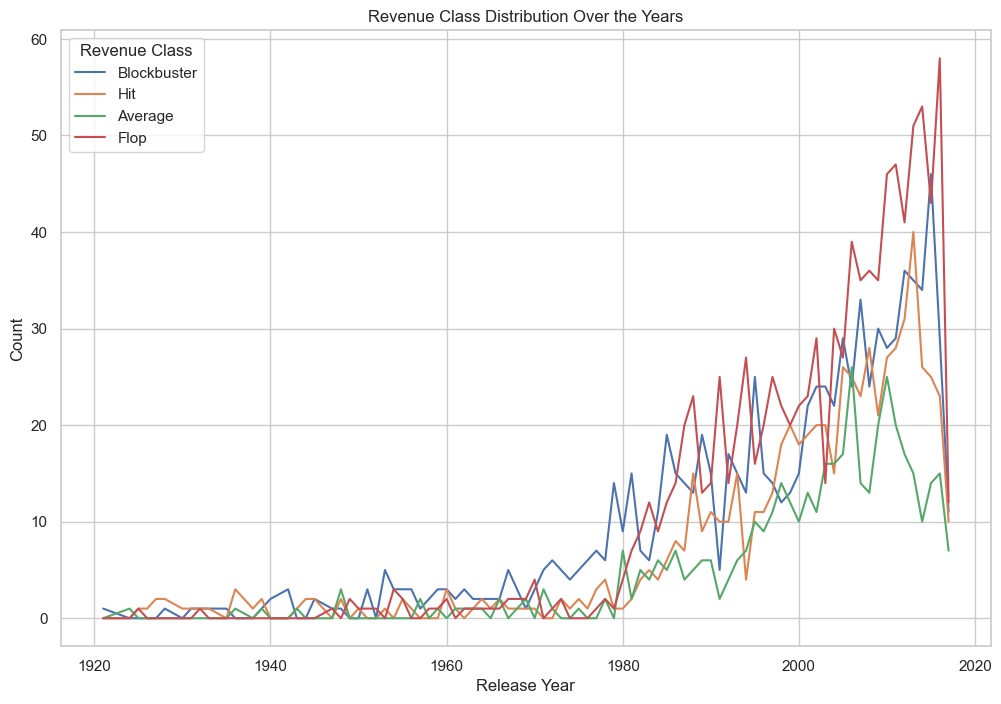

In [2574]:

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a DataFrame for the count of movies in each revenue class per release year
yearly_distribution = train.groupby(['release_year', 'revenue_class']).size().unstack().fillna(0)

# Use a line plot
sns.lineplot(data=yearly_distribution.reset_index(), x='release_year', y='Blockbuster', label='Blockbuster')
sns.lineplot(data=yearly_distribution.reset_index(), x='release_year', y='Hit', label='Hit')

sns.lineplot(data=yearly_distribution.reset_index(), x='release_year', y='Average', label='Average')
sns.lineplot(data=yearly_distribution.reset_index(), x='release_year', y='Flop', label='Flop')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Revenue Class Distribution Over the Years')
plt.legend(title='Revenue Class')
plt.show()



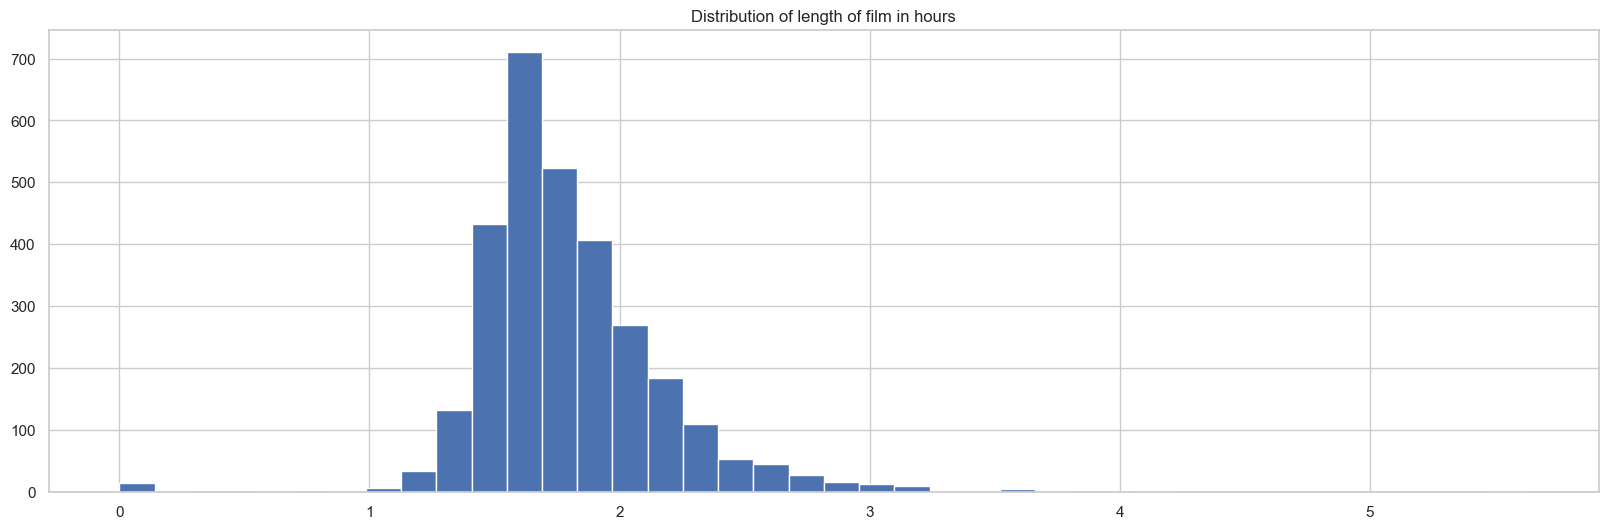

In [2575]:
plt.figure(figsize=(20, 6))
plt.hist(train['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');



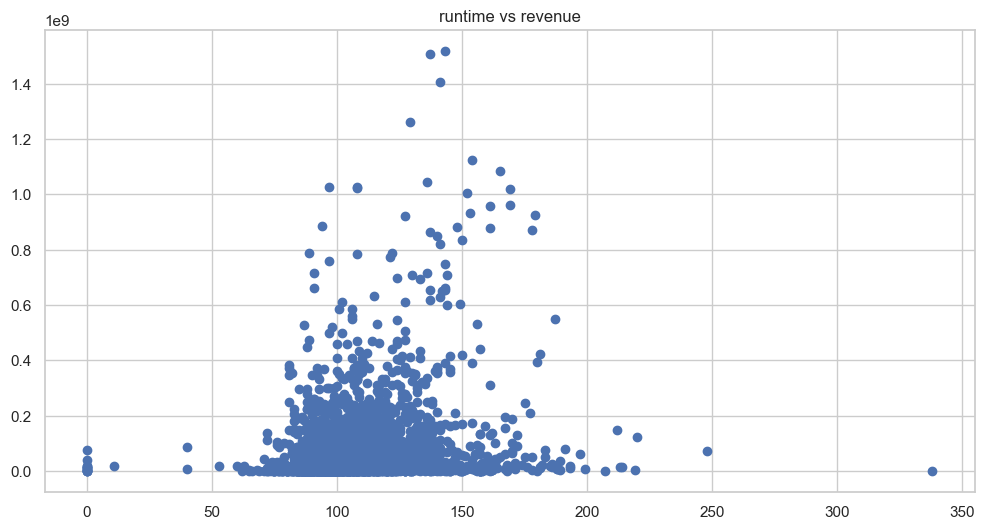

In [2576]:
plt.scatter(train['runtime'].fillna(0), train['revenue'])
plt.title('runtime vs revenue');



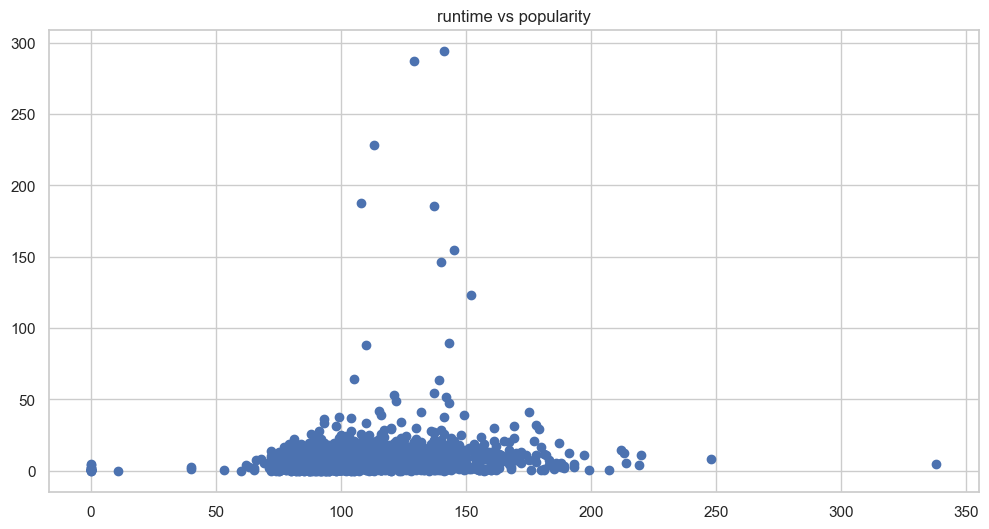

In [2577]:
plt.scatter(train['runtime'].fillna(0), train['popularity'])
plt.title('runtime vs popularity');

C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_25928\677591439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='revenue_class', y='runtime', data=train, palette='viridis')


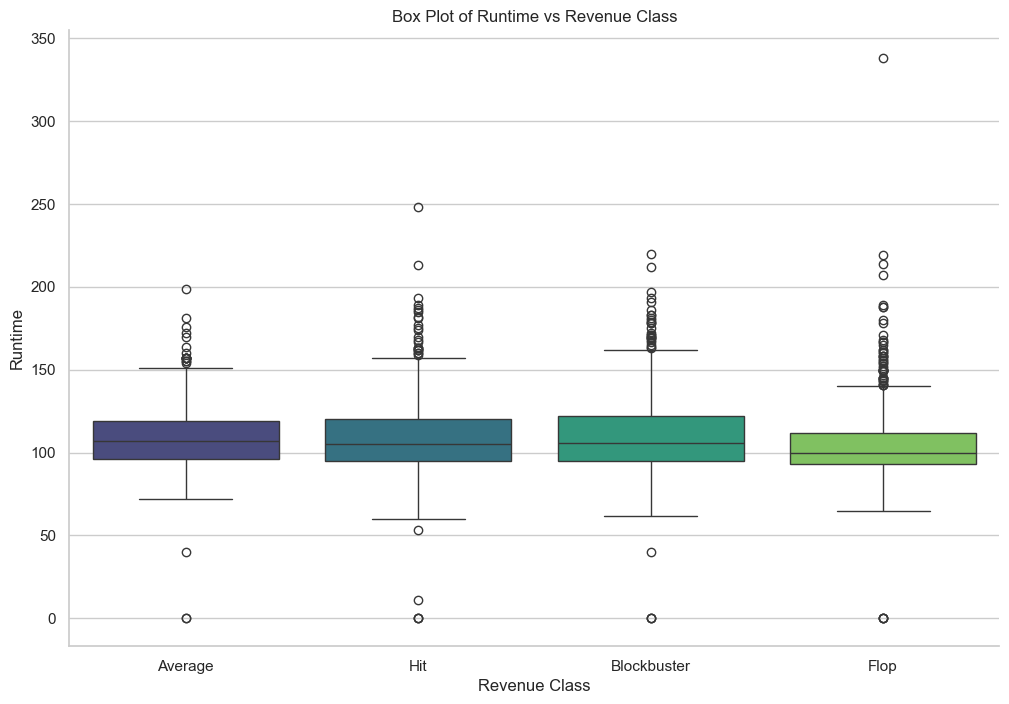

In [2578]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for 'runtime' vs 'revenue_class'
plt.figure(figsize=(12, 8))
sns.boxplot(x='revenue_class', y='runtime', data=train, palette='viridis')
plt.title('Box Plot of Runtime vs Revenue Class')
plt.xlabel('Revenue Class')
plt.ylabel('Runtime')

# Remove the top and right spines from the plot
sns.despine()

plt.show()


In [2579]:
crew=train['crew'].apply(lambda x:[i['name'] for i in x] if x != {} else [])
Counter([i for j in crew for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

                                                crew  num_crew
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...        72
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...         9
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...        64
3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...         3
4  [{'credit_id': '52fe464b9251416c75073b43', 'de...         2


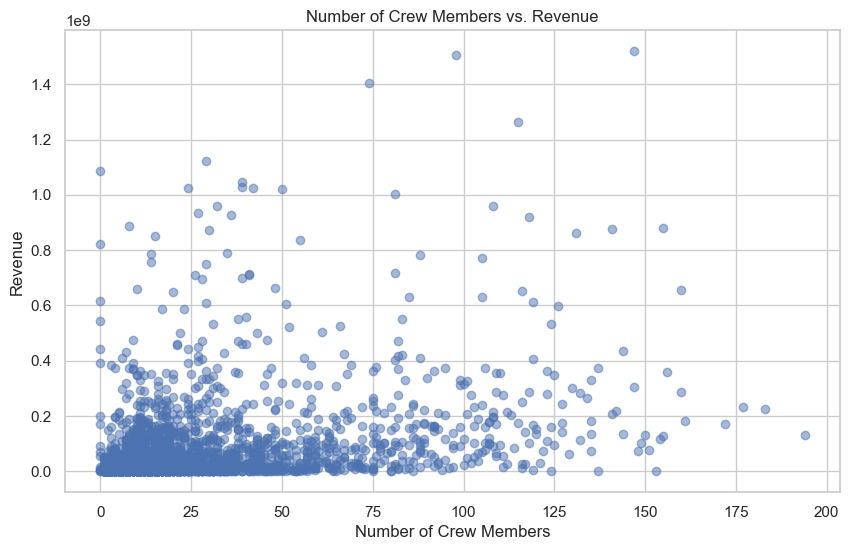

In [2580]:
# Create a new column 'num_crew'
train['num_crew'] = train['crew'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Display the DataFrame with the new 'num_crew' column
print(train[['crew', 'num_crew']].head())

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train['num_crew'], train['revenue'], alpha=0.5)
plt.title('Number of Crew Members vs. Revenue')
plt.xlabel('Number of Crew Members')
plt.ylabel('Revenue')
plt.show()



In [2581]:
# Assuming 'train' is your DataFrame

# Extracting male and female crew members and calculating the count
train['num_male_crew'] = train['crew'].apply(lambda x: sum(1 for member in x if member.get('gender') == 2) if isinstance(x, list) else 0)
train['num_female_crew'] = train['crew'].apply(lambda x: sum(1 for member in x if member.get('gender') == 1) if isinstance(x, list) else 0)

# Display the DataFrame with the new count columns
print(train[['num_male_crew', 'num_female_crew']])



      num_male_crew  num_female_crew
0                13                0
1                 4                4
2                11                4
3                 0                0
4                 0                0
...             ...              ...
2995             14                1
2996              4                1
2997              6                2
2998             18               10
2999             16                2

[3000 rows x 2 columns]


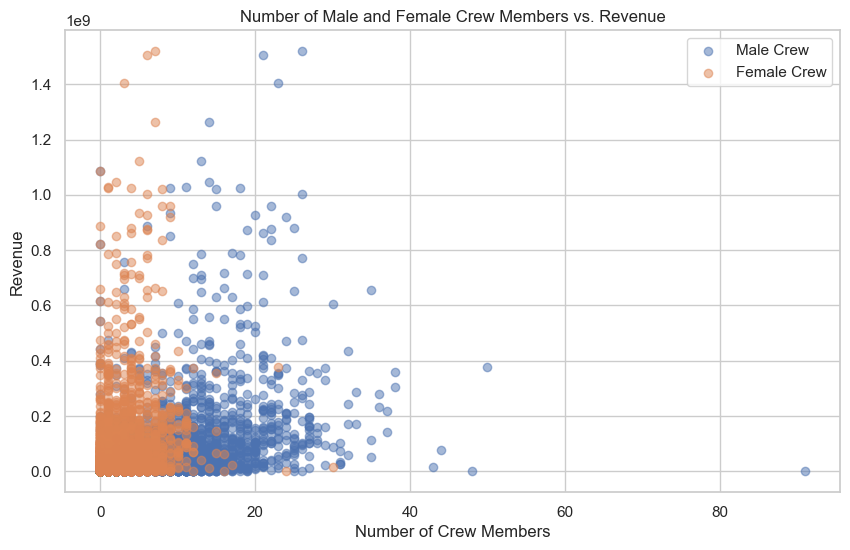

In [2582]:

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train['num_male_crew'], train['revenue'], label='Male Crew', alpha=0.5)
plt.scatter(train['num_female_crew'], train['revenue'], label='Female Crew', alpha=0.5)
plt.title('Number of Male and Female Crew Members vs. Revenue')
plt.xlabel('Number of Crew Members')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [2583]:
#Directors
train['director_name'] = train['crew'].apply(lambda x: next((member['name'] for member in x if member['job'] == 'Director'), None) if isinstance(x, list) else None)
# Assuming 'lead_actor_name' is the column containing lead actor names
# and 'revenue_class' is the column containing the success class of each movie

# Calculate the total number of films for each lead actor
director_total_films = train['director_name'].value_counts().reset_index()
director_total_films.columns = ['director_name', 'total_films']

# Calculate the number of hits and blockbusters for each lead actor
director_hits_blockbusters = train[train['revenue_class'].isin(['Hit', 'Blockbuster'])].groupby('director_name').size().reset_index()
director_hits_blockbusters.columns = ['director_name', 'hits_blockbusters']

# Merge the two dataframes to get the total number of films and hits/blockbusters for each lead actor
director_performance = pd.merge(director_total_films, director_hits_blockbusters, on='director_name', how='left')

# Fill NaN values with 0 (for actors with no hits/blockbusters)
director_performance['hits_blockbusters'].fillna(0, inplace=True)

# Calculate lead actor success based on the given criteria
director_performance['director_success'] = director_performance['hits_blockbusters'] / director_performance['total_films']

# Merge the lead actor success information back into the main dataframe
train = pd.merge(train, director_performance[['director_name', 'director_success']], on='director_name', how='left')

# Fill NaN values in the main dataframe with 0 (for actors with no hits/blockbusters)
train['director_success'].fillna(0, inplace=True)
train.drop('director_name', axis=1, inplace=True)


C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_25928\4057749807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='revenue_class', y='director_success', data=train, palette='viridis')


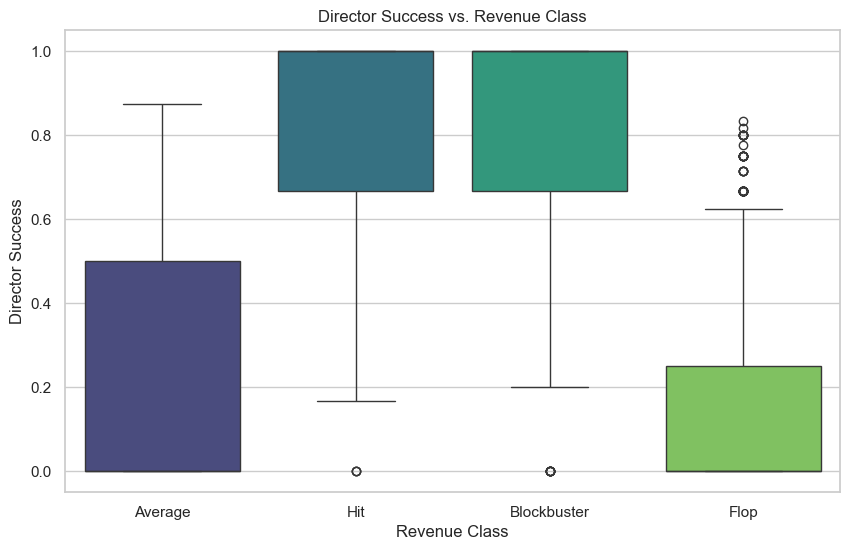

In [2584]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='revenue_class', y='director_success', data=train, palette='viridis')
plt.title('Director Success vs. Revenue Class')
plt.xlabel('Revenue Class')
plt.ylabel('Director Success')
plt.show()

In [2585]:
# Producers
train['producer_name'] = train['crew'].apply(lambda x: next((member['name'] for member in x if member['job'] == 'Producer'), None) if isinstance(x, list) else None)

# Calculate the total number of films for each producer
producer_total_films = train['producer_name'].value_counts().reset_index()
producer_total_films.columns = ['producer_name', 'total_films']

# Calculate the number of hits and blockbusters for each producer
producer_hits_blockbusters = train[train['revenue_class'].isin(['Hit', 'Blockbuster'])].groupby('producer_name').size().reset_index()
producer_hits_blockbusters.columns = ['producer_name', 'hits_blockbusters']

# Merge the two dataframes to get the total number of films and hits/blockbusters for each producer
producer_performance = pd.merge(producer_total_films, producer_hits_blockbusters, on='producer_name', how='left')

# Fill NaN values with 0 (for producers with no hits/blockbusters)
producer_performance['hits_blockbusters'].fillna(0, inplace=True)

# Calculate producer success based on the given criteria
producer_performance['producer_success'] = producer_performance['hits_blockbusters'] / producer_performance['total_films']

# Merge the producer success information back into the main dataframe
train = pd.merge(train, producer_performance[['producer_name', 'producer_success']], on='producer_name', how='left')

# Fill NaN values in the main dataframe with 0 (for producers with no hits/blockbusters)
train['producer_success'].fillna(0, inplace=True)
train.drop('producer_name', axis=1, inplace=True)


In [2586]:
# Original Music Composer
train['composer_name'] = train['crew'].apply(lambda x: next((member['name'] for member in x if member['job'] == 'Original Music Composer'), None) if isinstance(x, list) else None)

# Calculate the total number of films for each composer
composer_total_films = train['composer_name'].value_counts().reset_index()
composer_total_films.columns = ['composer_name', 'total_films']

# Calculate the number of hits and blockbusters for each composer
composer_hits_blockbusters = train[train['revenue_class'].isin(['Hit', 'Blockbuster'])].groupby('composer_name').size().reset_index()
composer_hits_blockbusters.columns = ['composer_name', 'hits_blockbusters']

# Merge the two dataframes to get the total number of films and hits/blockbusters for each composer
composer_performance = pd.merge(composer_total_films, composer_hits_blockbusters, on='composer_name', how='left')

# Fill NaN values with 0 (for composers with no hits/blockbusters)
composer_performance['hits_blockbusters'].fillna(0, inplace=True)

# Calculate composer success based on the given criteria
composer_performance['composer_success'] = composer_performance['hits_blockbusters'] / composer_performance['total_films']

# Merge the composer success information back into the main dataframe
train = pd.merge(train, composer_performance[['composer_name', 'composer_success']], on='composer_name', how='left')

# Fill NaN values in the main dataframe with 0 (for composers with no hits/blockbusters)
train['composer_success'].fillna(0, inplace=True)
train.drop('composer_name', axis=1, inplace=True)


In [2587]:
# Director of Photography
train['dop_name'] = train['crew'].apply(lambda x: next((member['name'] for member in x if member['job'] == 'Director of Photography'), None) if isinstance(x, list) else None)

# Calculate the total number of films for each director of photography
dop_total_films = train['dop_name'].value_counts().reset_index()
dop_total_films.columns = ['dop_name', 'total_films']

# Calculate the number of hits and blockbusters for each director of photography
dop_hits_blockbusters = train[train['revenue_class'].isin(['Hit', 'Blockbuster'])].groupby('dop_name').size().reset_index()
dop_hits_blockbusters.columns = ['dop_name', 'hits_blockbusters']

# Merge the two dataframes to get the total number of films and hits/blockbusters for each director of photography
dop_performance = pd.merge(dop_total_films, dop_hits_blockbusters, on='dop_name', how='left')

# Fill NaN values with 0 (for directors of photography with no hits/blockbusters)
dop_performance['hits_blockbusters'].fillna(0, inplace=True)

# Calculate director of photography success based on the given criteria
dop_performance['dop_success'] = dop_performance['hits_blockbusters'] / dop_performance['total_films']

# Merge the director of photography success information back into the main dataframe
train = pd.merge(train, dop_performance[['dop_name', 'dop_success']], on='dop_name', how='left')

# Fill NaN values in the main dataframe with 0 (for directors of photography with no hits/blockbusters)
train['dop_success'].fillna(0, inplace=True)
train.drop('dop_name', axis=1, inplace=True)


In [2588]:
cast=train['cast'].apply(lambda x:[i['name'] for i in x] if x != {} else [])
Counter([i for j in cast for i in j]).most_common(15)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

In [2589]:
# Create a new column 'num_cast'
train['num_cast'] = train['cast'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Display the DataFrame with the new 'num_cast' column
print(train[['cast', 'num_cast']].head())



                                                cast  num_cast
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...        24
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...        20
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...        51
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...         7
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...         4


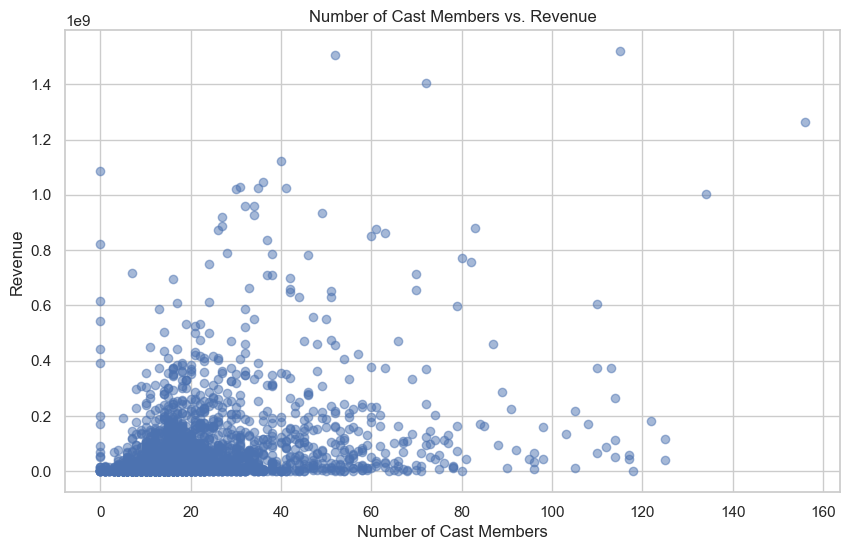

In [2590]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(train['num_cast'], train['revenue'], alpha=0.5)
plt.title('Number of Cast Members vs. Revenue')
plt.xlabel('Number of Cast Members')
plt.ylabel('Revenue')
plt.show()


In [2591]:
# Assuming 'cast' is the column containing information about the cast
# Create a new column 'lead_actor_name' with the lead actor's name

# Define a function to extract lead actor's name
def extract_lead_actor(cast):
    if cast and len(cast) > 0:
        return cast[0]['name']
    else:
        return None

# Apply the function to create the new column
train['lead_actor_name'] = train['cast'].apply(extract_lead_actor)
# Assuming 'lead_actor_name' is the column containing lead actor names
# and 'revenue_class' is the column containing the success class of each movie

# Calculate the total number of films for each lead actor
actor_total_films = train['lead_actor_name'].value_counts().reset_index()
actor_total_films.columns = ['lead_actor_name', 'total_films']

# Calculate the number of hits and blockbusters for each lead actor
actor_hits_blockbusters = train[train['revenue_class'].isin(['Hit', 'Blockbuster'])].groupby('lead_actor_name').size().reset_index()
actor_hits_blockbusters.columns = ['lead_actor_name', 'hits_blockbusters']

# Merge the two dataframes to get the total number of films and hits/blockbusters for each lead actor
actor_performance = pd.merge(actor_total_films, actor_hits_blockbusters, on='lead_actor_name', how='left')

# Fill NaN values with 0 (for actors with no hits/blockbusters)
actor_performance['hits_blockbusters'].fillna(0, inplace=True)

# Calculate lead actor success based on the given criteria
actor_performance['lead_actor_success'] = actor_performance['hits_blockbusters'] / actor_performance['total_films']

# Merge the lead actor success information back into the main dataframe
train = pd.merge(train, actor_performance[['lead_actor_name', 'lead_actor_success']], on='lead_actor_name', how='left')

# Fill NaN values in the main dataframe with 0 (for actors with no hits/blockbusters)
train['lead_actor_success'].fillna(0, inplace=True)
train.drop('lead_actor_name', axis=1, inplace=True)


C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_25928\640403298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='revenue_class', y='lead_actor_success', data=train, palette='viridis')


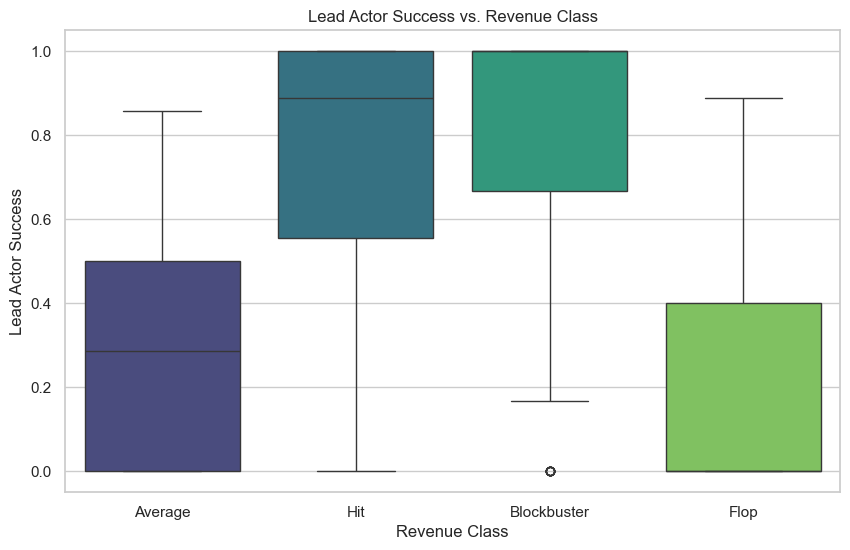

In [2592]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='revenue_class', y='lead_actor_success', data=train, palette='viridis')
plt.title('Lead Actor Success vs. Revenue Class')
plt.xlabel('Revenue Class')
plt.ylabel('Lead Actor Success')
plt.show()


In [2593]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3000 non-null   int64         
 1   belongs_to_collection  3000 non-null   int64         
 2   budget                 3000 non-null   float64       
 3   genres                 3000 non-null   object        
 4   homepage               946 non-null    object        
 5   original_language      3000 non-null   object        
 6   overview               2992 non-null   object        
 7   popularity             3000 non-null   float64       
 8   production_companies   3000 non-null   object        
 9   production_countries   3000 non-null   object        
 10  release_date           3000 non-null   datetime64[ns]
 11  runtime                2998 non-null   float64       
 12  spoken_languages       3000 non-null   object        
 13  sta

In [2594]:
def prepare_data(df):
    df['_budget_runtime_ratio'] = (df['budget'] / df['runtime']).replace([np.inf, -np.inf, np.nan], 0)
    df['_budget_popularity_ratio'] = df['budget'] / df['popularity']
    df['_budget_year_ratio'] = df['budget'].fillna(0) / (df['release_year'] * df['release_year'])
    df['_releaseYear_popularity_ratio'] = df['release_year'] / df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity'] / df['release_year']

    for col in ['genres']:
        df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1, sort=False)
    df.drop(['genres_etc'], axis=1, inplace=True)
    df.drop(['Documentary'], axis=1, inplace=True)
    df.drop(['Foreign'], axis=1, inplace=True)
    df.drop(['Western'], axis=1, inplace=True)
    df.drop(['Animation'], axis=1, inplace=True)
    df.drop(['Music'], axis=1, inplace=True)

    cols_to_normalize = ['runtime', 'popularity', 'log_budget', '_budget_runtime_ratio', '_budget_year_ratio', '_budget_popularity_ratio', '_releaseYear_popularity_ratio',
                          '_releaseYear_popularity_ratio2', 'num_genres', 'num_company', 'num_languages', 'num_words_in_title', 'overveiw_count', 'company_success', 'director_success', 'num_crew', 'num_cast', 'num_male_crew', 'num_female_crew', 'dop_success', 'composer_success', 'producer_success', 'lead_actor_success']
    for col in cols_to_normalize:
        print(col)
        x_array = []
        x_array = np.array(df[col].fillna(0))
        X_norm = normalize([x_array])[0]
        df[col] = X_norm

    df = df.drop(['genres', 'imdb_id', 'revenue', 'poster_path', 'homepage', 'overview', 'id', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'title', 'Keywords', 'cast', 'crew', 'original_language', 'original_title', 'tagline', 'log_revenue'], axis=1)

    df.fillna(value=0.0, inplace=True)

    return df

In [2595]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3000 non-null   int64         
 1   belongs_to_collection  3000 non-null   int64         
 2   budget                 3000 non-null   float64       
 3   genres                 3000 non-null   object        
 4   homepage               946 non-null    object        
 5   original_language      3000 non-null   object        
 6   overview               2992 non-null   object        
 7   popularity             3000 non-null   float64       
 8   production_companies   3000 non-null   object        
 9   production_countries   3000 non-null   object        
 10  release_date           3000 non-null   datetime64[ns]
 11  runtime                2998 non-null   float64       
 12  spoken_languages       3000 non-null   object        
 13  sta

In [2596]:
def get_json(df):
    global dict_columns
    result=dict()
    for col in dict_columns:
        d=dict()
        rows=df[col].values
        for row in rows:
            if row is None: continue
            for i in row:
                if i['name'] not in d:
                    d[i['name']]=0
                else:
                    d[i['name']]+=1
            result[col]=d
    return result
    

    
train_dict=get_json(train)
test_dict=get_json(test)

In [2597]:
for col in dict_columns :
    
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   
    
    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]

In [2598]:
test['revenue_class']=np.nan
all_data=prepare_data((pd.concat([train,test]))).reset_index(drop=True)
train=all_data.loc[:train.shape[0]-1,:]
test=all_data.loc[train.shape[0]:,:]



runtime
popularity
log_budget
_budget_runtime_ratio
_budget_year_ratio
_budget_popularity_ratio
_releaseYear_popularity_ratio
_releaseYear_popularity_ratio2
num_genres
num_company
num_languages
num_words_in_title
overveiw_count
company_success
director_success
num_crew
num_cast
num_male_crew
num_female_crew
dop_success
composer_success
producer_success
lead_actor_success


In [2599]:

train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   belongs_to_collection           3000 non-null   object 
 1   budget                          3000 non-null   float64
 2   popularity                      3000 non-null   float64
 3   runtime                         3000 non-null   float64
 4   log_budget                      3000 non-null   float64
 5   revenue_class                   3000 non-null   object 
 6   originally_english              3000 non-null   float64
 7   num_languages                   3000 non-null   float64
 8   released_in_english             3000 non-null   float64
 9   num_genres                      3000 non-null   float64
 10  has_homepage                    3000 non-null   float64
 11  overveiw_count                  3000 non-null   float64
 12  num_company                     30

In [2600]:
y=train['revenue_class']
x=train.drop(['revenue_class'],axis=1)

In [2601]:
print(x.columns)

Index(['belongs_to_collection', 'budget', 'popularity', 'runtime',
       'log_budget', 'originally_english', 'num_languages',
       'released_in_english', 'num_genres', 'has_homepage', 'overveiw_count',
       'num_company', 'company_success', 'usa_produced', 'has_tagline',
       'num_words_in_title', 'release_day', 'release_month', 'release_year',
       'num_crew', 'num_male_crew', 'num_female_crew', 'director_success',
       'producer_success', 'composer_success', 'dop_success', 'num_cast',
       'lead_actor_success', '_budget_runtime_ratio',
       '_budget_popularity_ratio', '_budget_year_ratio',
       '_releaseYear_popularity_ratio', '_releaseYear_popularity_ratio2',
       'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Mystery', 'Romance', 'Science Fiction',
       'Thriller', 'War'],
      dtype='object')


In [2602]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
kfold=KFold(n_splits=3,random_state=42,shuffle=True)

In [2603]:
print(x.columns)
print(y)

Index(['belongs_to_collection', 'budget', 'popularity', 'runtime',
       'log_budget', 'originally_english', 'num_languages',
       'released_in_english', 'num_genres', 'has_homepage', 'overveiw_count',
       'num_company', 'company_success', 'usa_produced', 'has_tagline',
       'num_words_in_title', 'release_day', 'release_month', 'release_year',
       'num_crew', 'num_male_crew', 'num_female_crew', 'director_success',
       'producer_success', 'composer_success', 'dop_success', 'num_cast',
       'lead_actor_success', '_budget_runtime_ratio',
       '_budget_popularity_ratio', '_budget_year_ratio',
       '_releaseYear_popularity_ratio', '_releaseYear_popularity_ratio2',
       'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Mystery', 'Romance', 'Science Fiction',
       'Thriller', 'War'],
      dtype='object')
0           Average
1               Hit
2       Blockbuster
3       Blockbuster
4              Flop
           ... 

In [2604]:
#RANDOM FOREST

In [2605]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)
feature_importance = rf_classifier.feature_importances_

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))





Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

     Average       0.57      0.19      0.29        42
 Blockbuster       0.70      0.81      0.75        84
        Flop       0.75      0.94      0.84       106
         Hit       0.68      0.56      0.61        68

    accuracy                           0.71       300
   macro avg       0.68      0.63      0.62       300
weighted avg       0.70      0.71      0.68       300



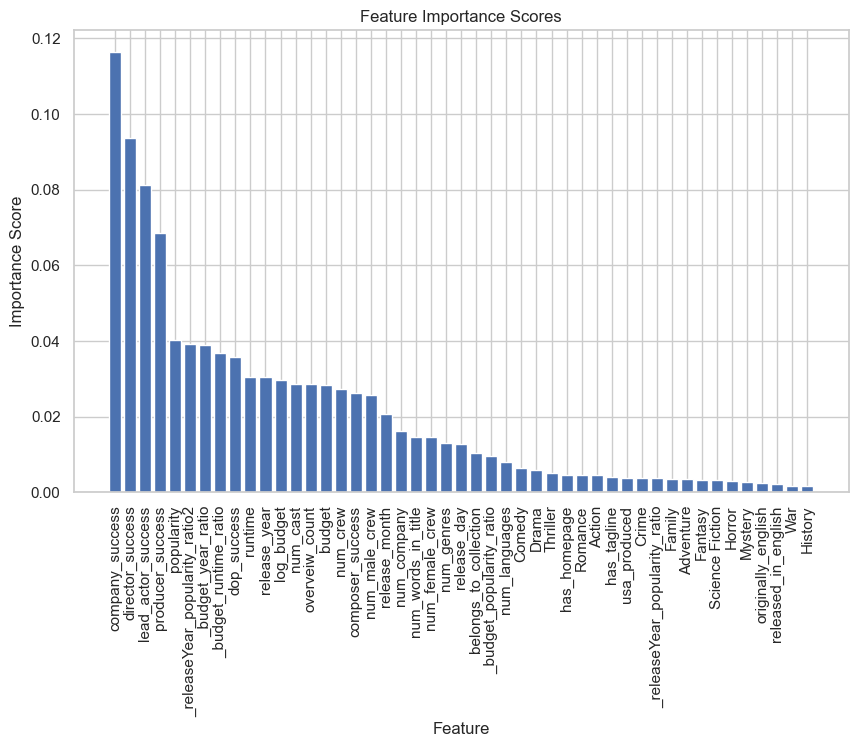

Feature Importance Scores:
company_success: 0.1163155296652302
director_success: 0.09367147008175478
lead_actor_success: 0.08122254469375792
producer_success: 0.06861417318212432
popularity: 0.04022517171766332
_releaseYear_popularity_ratio2: 0.039268955376948494
_budget_year_ratio: 0.03899133139620036
_budget_runtime_ratio: 0.03689024720794655
dop_success: 0.03588090117812107
runtime: 0.030424491121526485
release_year: 0.030354231074215216
log_budget: 0.029605754585477137
num_cast: 0.02868528336371066
overveiw_count: 0.02854141528164177
budget: 0.02846245466214625
num_crew: 0.027199179788547835
composer_success: 0.026236602424129982
num_male_crew: 0.02566555653606462
release_month: 0.02065010921770686
num_company: 0.01615805747903305
num_words_in_title: 0.014680743628885495
num_female_crew: 0.014583416401988862
num_genres: 0.01294967732733061
release_day: 0.01275733330468467
belongs_to_collection: 0.010496705986635541
_budget_popularity_ratio: 0.009615638279470168
num_languages: 0.008

In [2606]:
# Sort indices based on feature importance
sorted_indices = feature_importance.argsort()[::-1]

# Get the names of features in descending order of importance
sorted_features = X_train.columns[sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.xticks(range(len(feature_importance)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()

# Display the importance scores
print("Feature Importance Scores:")
for feature, importance in zip(sorted_features, feature_importance[sorted_indices]):
    print(f"{feature}: {importance}")


In [2609]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming you have already preprocessed your data and have features X and labels y


# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_model = SVC(kernel='rbf', C=1.0)  # You can adjust the kernel and C parameter based on your data

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy on Test Set: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy on Test Set: 0.6933333333333334
Classification Report:
               precision    recall  f1-score   support

     Average       0.40      0.10      0.15        42
 Blockbuster       0.68      0.80      0.74        84
        Flop       0.74      0.95      0.83       106
         Hit       0.65      0.53      0.59        68

    accuracy                           0.69       300
   macro avg       0.62      0.59      0.58       300
weighted avg       0.66      0.69      0.65       300



In [2614]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the accuracy
print(f"Accuracy on Test Set: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy on Test Set: 0.6033333333333334
Classification Report:
               precision    recall  f1-score   support

     Average       0.40      0.10      0.15        42
 Blockbuster       0.68      0.80      0.74        84
        Flop       0.74      0.95      0.83       106
         Hit       0.65      0.53      0.59        68

    accuracy                           0.69       300
   macro avg       0.62      0.59      0.58       300
weighted avg       0.66      0.69      0.65       300

